Task 3: Customer Segmentation / Clustering

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


Load and Merge the Data

In [3]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

data = pd.merge(transactions, customers, on='CustomerID', how='left')

customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',    # Total money spent
    'Quantity': 'sum',      # Total items purchased
}).reset_index()

customer_data = pd.merge(customer_data, customers, on='CustomerID', how='left') # Merge aggregated data with customer profile data
customer_data['Region'] = customer_data['Region'].astype('category').cat.codes  # Convert 'Region' to numeric values (for clustering)


Selecting and Standardizing features for clustering

In [4]:
features = customer_data[['TotalValue', 'Quantity', 'Region']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Applying K-Means Clustering

In [6]:
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


# Plot the Elbow Curve

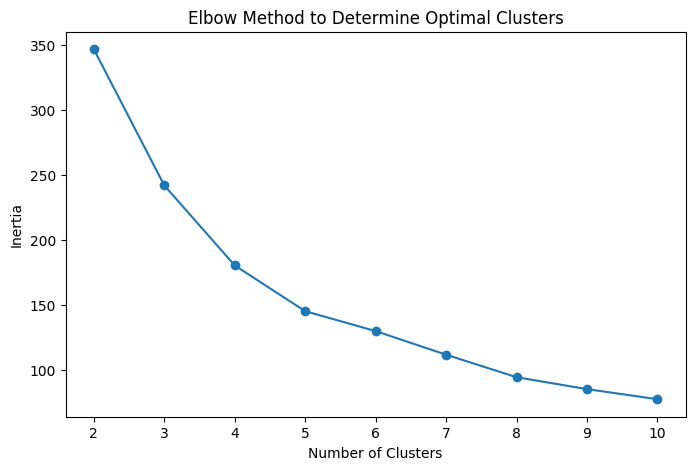

In [11]:

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with optimal number of clusters and performing clusters

In [9]:
optimal_clusters = 4  # Replace with the number you select
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

db_index = davies_bouldin_score(features_scaled, customer_data['Cluster']) # Calculate Davies-Bouldin Index
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.932037310279212


# Visualization clusters with a pairplot



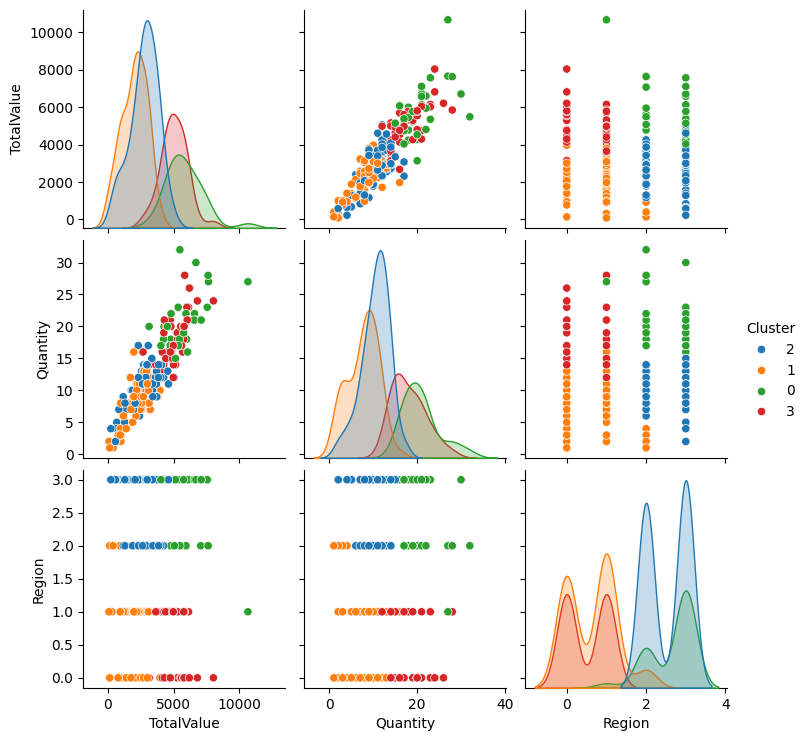

In [10]:
customer_data['Cluster'] = customer_data['Cluster'].astype(str)

sns.pairplot(customer_data, hue='Cluster', diag_kind='kde', vars=['TotalValue', 'Quantity', 'Region'])
plt.show()
